## Capstone notes/review

In [1]:
#Engineering & stats
#1 gathering data
#turning data into usable data
#doing a statistical test on that data

In [ ]:
#make sure it's well written and clean code


In [2]:
#how can I webscrape the IRS data and how do i want to visualize it
#with the change unlimited
#what kind of questions would I want to answer for change unlimited

In [4]:
#what data am I gathering
#where am I gathering this data

## SAMPLING DISTRIBUTION

**PUT TOGETHER A FLASHCARD VOCAB FOR STATS**

#### VOCAB WORDS

1.random variable
2. cdf ---> pdf -----> pmf
3. probability
4. statistics
5. expectation
6. variance
7. standard deviation
8. bootstrap sampling


In [194]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Always make it pretty.
plt.style.use('seaborn')

x = np.linspace(-3, 3, num=250)
count = np.zeros(shape=len(x))
data = stats.norm(0.1, 1.0).rvs(100)

for datum in data:
    count = count + np.array(x >= datum)
print(count)  

print(len(x))

[  1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
   1.   1.   1.   1.   2.   2.   2.   2.   2.   2.   2.   2.   2.   2.
   2.   2.   2.   2.   2.   2.   2.   2.   2.   2.   2.   2.   2.   2.
   2.   2.   2.   2.   3.   3.   3.   3.   3.   4.   4.   4.   5.   5.
   5.   5.   5.   5.   5.   5.   6.   6.   6.   7.   7.   7.   7.   7.
   7.   7.   7.   7.   7.   7.   8.   8.   8.   8.   8.   8.   9.   9.
   9.   9.   9.   9.   9.  10.  10.  12.  13.  13.  14.  15.  15.  17.
  18.  18.  21.  23.  24.  25.  25.  25.  26.  29.  30.  31.  32.  32.
  32.  34.  36.  36.  38.  39.  40.  40.  42.  43.  45.  46.  46.  46.
  47.  47.  48.  50.  50.  52.  52.  53.  57.  58.  58.  58.  58.  59.
  59.  60.  61.  65.  66.  66.  67.  67.  67.  68.  69.  69.  69.  71.
  72.  72.  72.  73.  74.  75.  75.  76.  76.  78.  78.  79.  80.  82.
  82.  82.  83.  83.  83.  84.  85.  85.  88.  89.  89.  90.  92.  93.
  93.  93.  93.  93.  93.  93.  93.  94.  94.  94.  94.  94.  94.  95.
  95. 

In [195]:
#read about unbiased sampling, the difficulty of getting a sample
#that is unbiased.

In [196]:
def bootstrap(x, resamples=10000):
    """Draw bootstrap resamples from the array x.

    Parameters
    ----------
    x: np.array, shape (n, )
      The data to draw the bootstrap samples from.
    
    resamples: int
      The number of bootstrap samples to draw from x.
    
    Returns
    -------
    bootstrap_samples: np.array, shape (resamples, n)
      The bootsrap resamples from x.
    """
    pass




In [197]:
data = np.random.randint(1,9, size=10)   
    
def bootstrap(x, resamples=10000):
    
    new_arr = []
    
    for _ in range(resamples):
        rand = np.random.choice(x, size=len(x), replace=True)
        new_arr.append(rand)
    return new_arr


In [198]:
def bootstrap_ci(sample, func, ci):
    bs_sample = bootstrap(sample)
    bs_func = [func(x) for x in bs_sample]
    
    low = np.percentile(bs_func, q=(100-ci)/2 )
    high = np.percentile(bs_func,q=(100-ci)/2+ci)

    return low, high

In [199]:
#simplify this to only include the pararmeters necessary to plot,
#not do the actual work within the function. this should only plot. 

def bootstrap_ci_plot(sample, func, ci):
    bs_sample = bootstrap(sample)
    bs_func = [func(x) for x in bs_sample]
    
    low = np.percentile(bs_func, q=(100-ci)/2 )
    high = np.percentile(bs_func,q=(100-ci)/2+ci)

    fig, ax = plt.subplots(figsize=(10,4))
    ax.hist(bs_func, bins=20)


In [200]:
bootstrap_ci(data, np.mean, 95)

(3.5, 6.3)

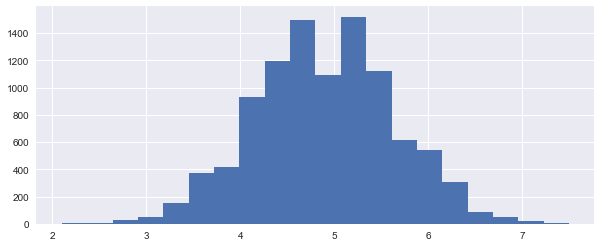

In [201]:
bootstrap_ci_plot(data, np.mean, 95)

In [202]:
prod = np.loadtxt('data.txt')

In [203]:
bootstrap_ci(prod, np.mean, 95)

(-0.2681000000000003, 10.308299999999997)

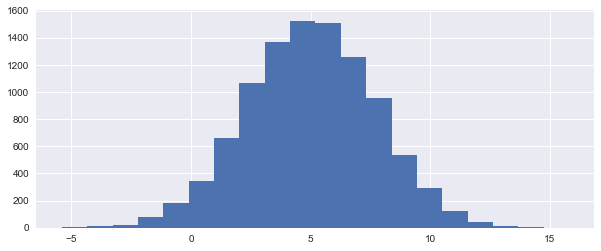

In [204]:
bootstrap_ci_plot(prod, np.mean, 95)

In [205]:
ci_90 = bootstrap_ci(prod, np.mean, 90)
ci_95 = bootstrap_ci(prod, np.mean, 95)

In [206]:
programmers = 100
change_monitors = 500
productivity = 2000





In [207]:
law = np.loadtxt('law_samples.txt')

In [208]:
law.dtype

dtype('float64')

In [209]:
corr, p_value = stats.pearsonr(law[:,0], law[:,1])
corr, p_value

(0.776374491289407, 0.0006651020111028156)

In [210]:
# lower_ci, upper_ci, bootstrap_corr_law = bootstrap_ci(
#     law, 
#     lambda x: stats.pearsonr(x[:, 0], x[:, 1])[0],
#     95)

## Law of Large Numbers

#### Vocab


**Probability Sampling**
1. simple random sampling
2. systematic sampling
3. stratified sampling
4. cluster sampling


**Non-Probability Sampling**
1. convenience sampling
2. voluntary response sampling
3. purposive sampling
4. snowball sampling

1. mean (expectation)
2. 

In [260]:
def coin_flip(n_flips, p):
    data = stats.binom(1,p).rvs(n_flips)
    return data, np.mean(data)

In [244]:
def compute_cumlative_sample_means(sample):
    cumlative_sums = np.cumsum(sample)
    sample_sizes = np.arange(1, len(cumlative_sums) + 1)
    sample_means = cumlative_sums / sample_sizes
    return sample_sizes, sample_means


In [218]:
data, mean = coin_flip(1000,.5) #avg should move towards prob of event

In [213]:
coin_flip(1000,.6) #result should move towards prob of event, skew towards higher prob event

0.607

In [214]:
pop = [0,1,1,0,1,1,0,1,0,0,1]
sam1 = [1,0,1,1,1,0] ----> mean 
sam2 = [0,0,1,0,1,0] -----> mean
sam2 = [1,0,0,0,1,0] 

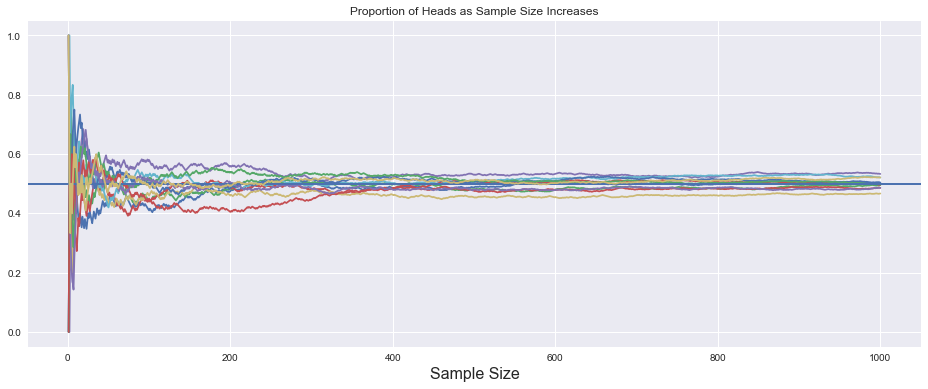

In [289]:
def make_sample_mean_path(n_flips,end, p):
    fig, ax = plt.subplots(1, 1, figsize=(16, 6), sharex=True, sharey=True)

    ax.set_title("Proportion of Heads as Sample Size Increases")
    for _ in range(end+1):
        sample_sizes, sample_means = compute_cumlative_sample_means(coin_flip(n_flips,p)[0])
        ax.axhline(y=p, )
        ax.plot(sample_sizes, sample_means)
        ax.set_xlabel("Sample Size", fontsize=16)
        
make_sample_mean_path(1000, 10, .5)

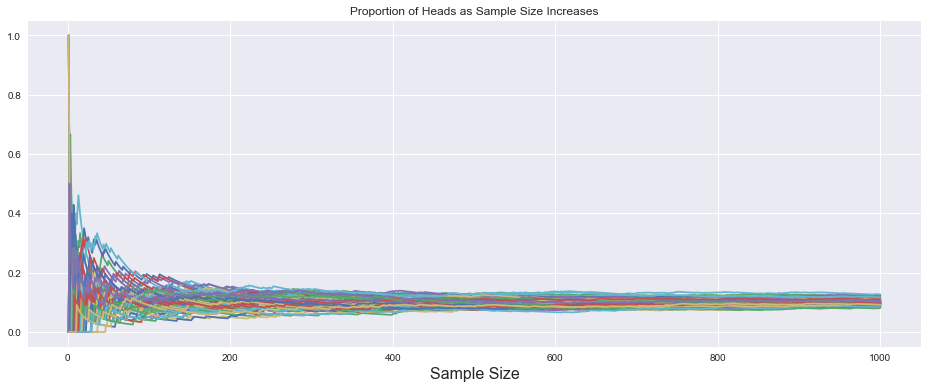

In [271]:
def make_sample_mean_path(n_flips,end, p):
    fig, ax = plt.subplots(1, 1, figsize=(16, 6), sharex=True, sharey=True)

    ax.set_title("Proportion of Heads as Sample Size Increases")
    for _ in range(end+1):
        sample_sizes, sample_means = compute_cumlative_sample_means(coin_flip(n_flips,p)[0])
        ax.plot(sample_sizes, sample_means)
        ax.set_xlabel("Sample Size", fontsize=16)
        
make_sample_mean_path(1000, 100, .1)

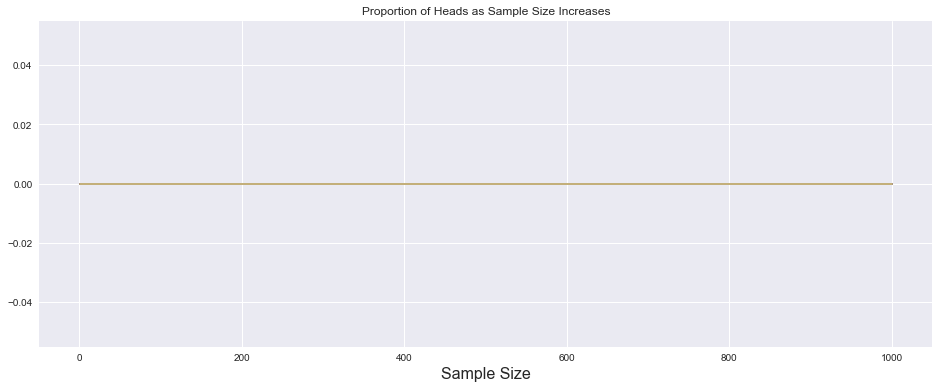

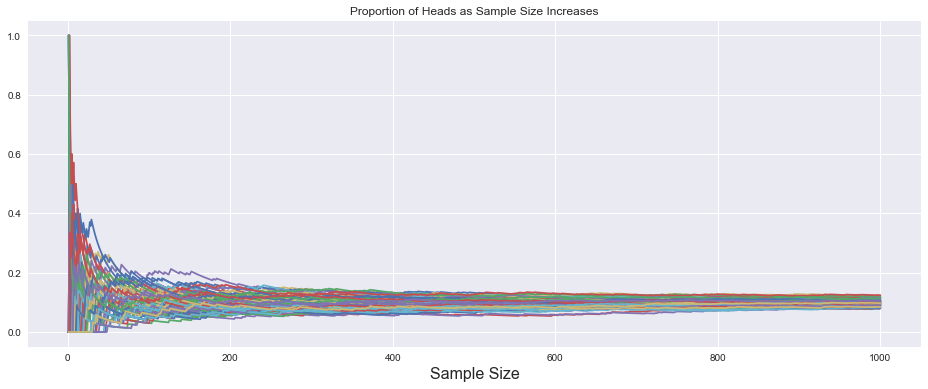

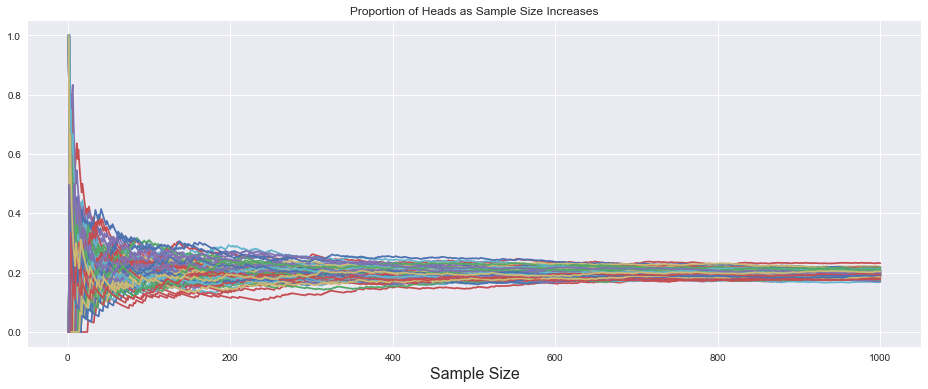

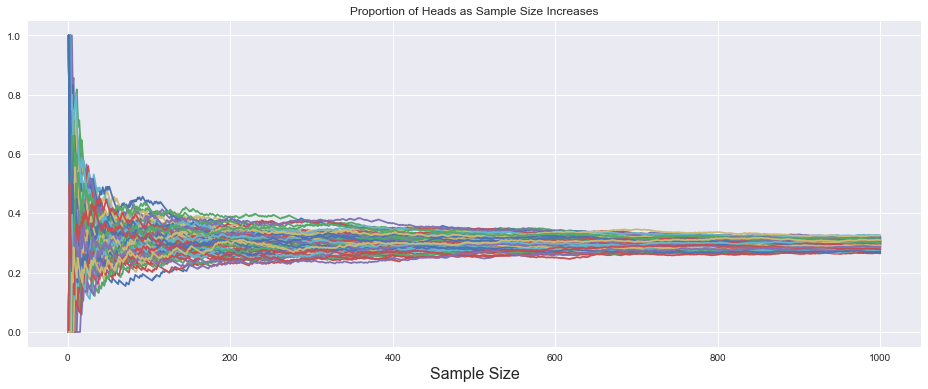

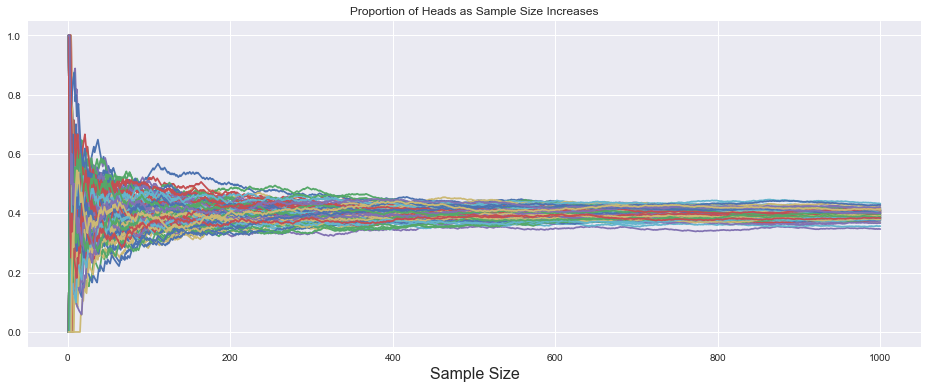

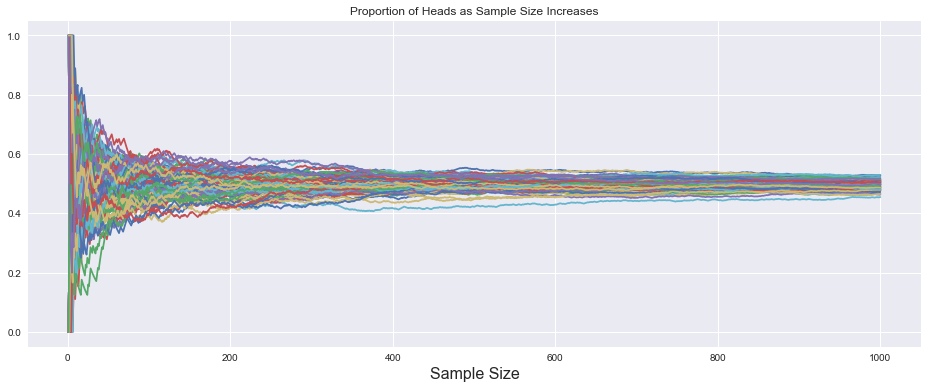

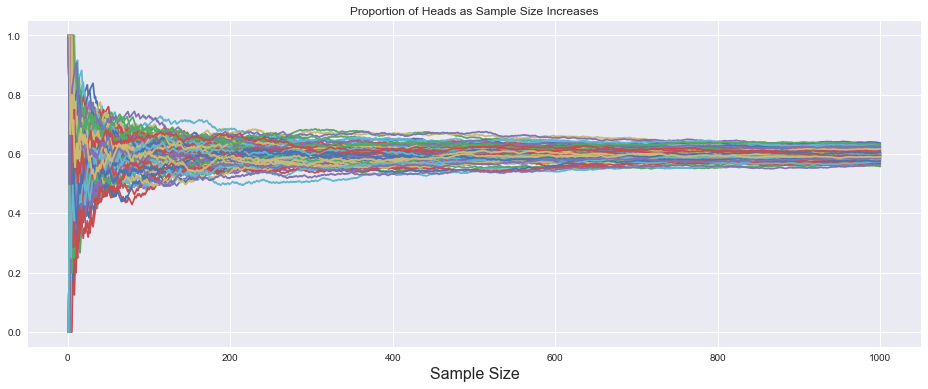

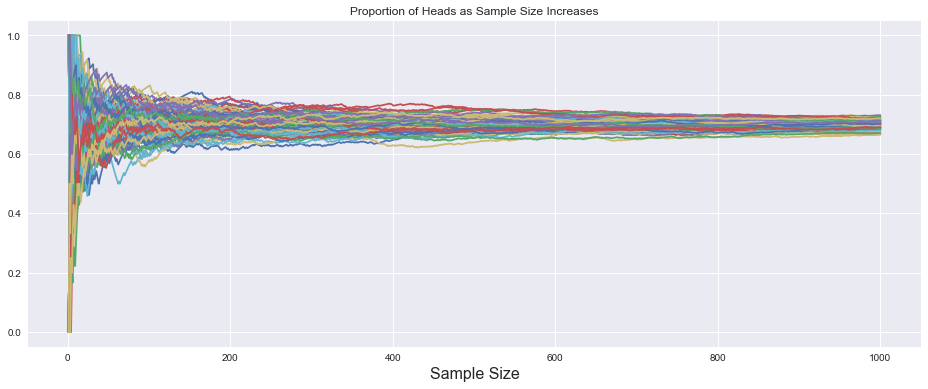

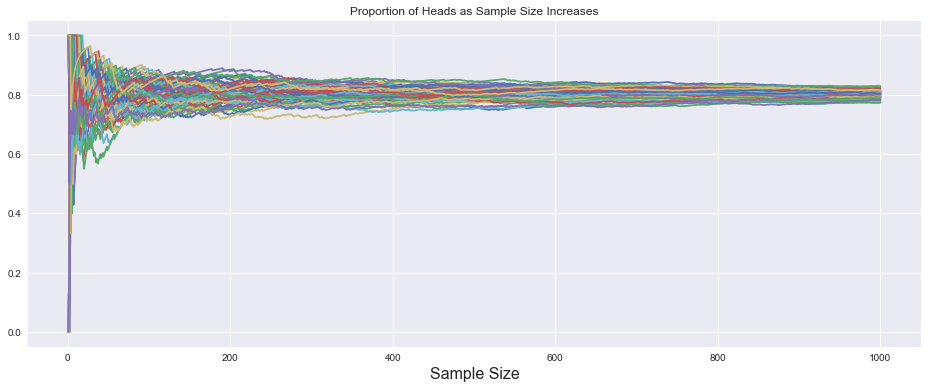

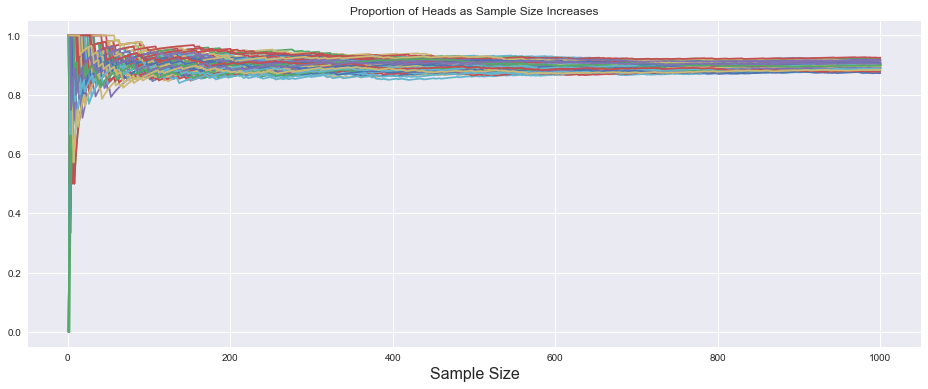

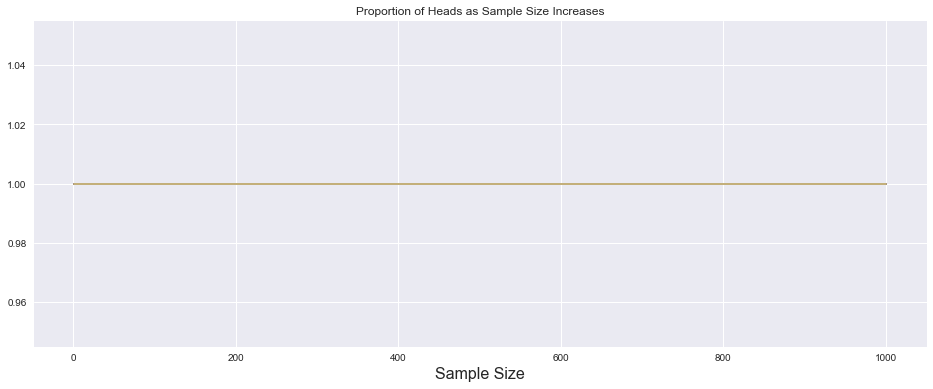

In [273]:
fairnesses = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

for p in fairnesses:
    make_sample_mean_path(1000,100,p)

In [284]:
loop_mean = np.array([coin_flip(100,p)[1] for p in fairnesses for _ in range(101)])
